In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

from os import system
from os.path import join, basename

import numpy as np
import matplotlib.pyplot as plt
from h5py import File
import seaborn as sns
from scipy.stats import norm
import scienceplots

import candel
from utils import * 


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
config = candel.load_config(config_path, )


root = join(config["root_main"], "results", "CF4_H0_anisotropy")
print(f"root: {root}")

root: /Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy


In [3]:
!ls /Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los*.hdf5

/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-CSFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-default.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_dust-CSFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_dust-default.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_noMNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_lo

## Table 1. Evidence comparison

In [13]:
which = "AIC"

for dust_choice in ["", "default", "CSFD"]:
    fname = join(root, "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5")

    if len(dust_choice) > 0:
        fname = fname.replace(".hdf5", f"_dust-{dust_choice}.hdf5")
    print(f"File: {basename(fname)}")
    print(compare_zeropoint_dipole_gof(fname, which))

    # system(f"open {fname.replace('.hdf5', '.png')}")
    print()



File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5
[DIPOLE]:    51135.34765625
[ISO]:       51135.5859375
[INFO] File last modified: 2025-05-23 12:46:49
-0.23828125

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-default.hdf5
[DIPOLE]:    51137.125
[ISO]:       51136.88671875
[INFO] File last modified: 2025-05-23 13:35:32
0.23828125

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-CSFD.hdf5
[DIPOLE]:    51137.36328125
[ISO]:       51136.8125
[INFO] File last modified: 2025-05-23 13:45:41
0.55078125



### Figure 1: Carrick+2015 MNR posterior with a dipole

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=22,
    keys=None,
    filename="C15_full_posterior.pdf",
    )

### Figure 2: Zoom-in on the magnitude dipole

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_noMNR.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-default.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-CSFD.hdf5",
    ]

labels = [
    "Isotropic",
    "Dipole",
    "Dipole + dust (default)",
    "Dipole + dust (CSFD)",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=16,
    labels=labels,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b", "sigma_v", "sigma_mu"],
    filename="C15_mag_dipole.pdf",
    )

### Figure: Pantheon+ dipole

In [ ]:
fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_PantheonPlus_MNR_Mdip_prior.hdf5"


keys = ["M_dipole_mag", "M_dipole_ell", "M_dipole_b", ]
plot_corner_from_hdf5(fname, keys=keys, filename="Pantheon+_dipole.pdf", )

### Figure: Evidence as a function of the sample size

In [4]:
mock_dir = "/Users/rstiskalek/Projects/CANDEL/results/mock_CF4_H0_anisotropy"

records = np.loadtxt("/Users/rstiskalek/Projects/CANDEL/data/CF4_mock/mock_index.txt", dtype=int, comments='#')
indices, nsamples = records[:, 0], records[:, 1]

fnames = [join(mock_dir, f"precomputed_los_Carrick2015_CF4_mock_{i}_noMNR_aTFRdipole.hdf5")
          for i in indices]


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_72514/482110498.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


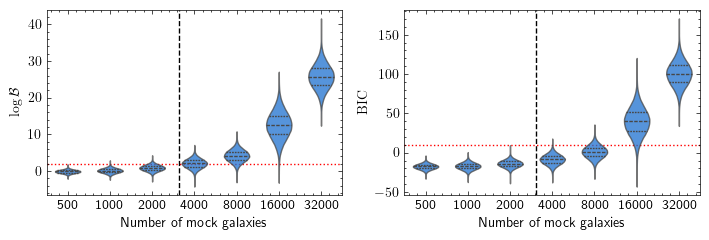

In [ ]:
metrics = ["logZ_harmonic", "BIC"]
with plt.style.context("science"):
    fig, axes = plt.subplots(1, 2, figsize=(7.2, 2.5))
    lw = plt.rcParams["lines.linewidth"]
    unique_ns = np.unique(nsamples)

    for ax, metric in zip(axes, metrics):
        all_resamples = []
        all_positions = []

        gof = [
            compare_zeropoint_dipole_gof(fname, metric, verbose=False)
            for fname in fnames
        ]
        gof = np.asarray(gof)
        if metric == "BIC":
            gof *= -1

        for num_samples in unique_ns:
            mask = nsamples == num_samples
            gof_vals = gof[mask]

            if np.sum(np.isfinite(gof_vals)) == 0:
                continue

            resampled = norm.rvs(
                loc=np.nanmean(gof_vals),
                scale=np.nanstd(gof_vals),
                size=100_000
            )
            all_resamples.extend(resampled)
            all_positions.extend([str(num_samples)] * len(resampled))

        sns.violinplot(
            ax=ax,
            x=all_positions,
            y=all_resamples,
            inner="quart",
            cut=0,
            bw_method="scott",
            width=0.6,
            color="#006FED",
            alpha=0.75,
            linewidth=lw,
            density_norm="width",
        )

        ax.set_xlabel("Number of mock galaxies")

    axes[0].axhline(2, color="red", linestyle="dotted", lw=lw, zorder=0)
    axes[1].axhline(10, color="red", linestyle="dotted", lw=lw, zorder=0)

    axes[0].set_ylabel(r"$\log \mathcal{B}$")
    axes[1].set_ylabel(r"$\mathrm{BIC}$")

    xticks = np.array([int(t.get_text()) for t in ax.get_xticklabels()])
    if 3250 > xticks.min() and 3250 < xticks.max():
        # Linear interpolation to get fractional index position
        x_idx = np.interp(3250, xticks, np.arange(len(xticks)))
        for i in range(2):
            axes[i].axvline(
                x=x_idx, c="k", linestyle="dashed", lw=lw, zorder=0)


    fig.tight_layout()
    # fig.savefig("gof_comparison.pdf", dpi=450)
    fig.show()

### Playground

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    keys=["Vext_mag", "Vext_ell", "Vext_b"],
    )